## Transfer Learning VGG 16 and VGG 19 using Keras

Please download the dataset from the below url

In [1]:
from tensorflow.compat.v1 import ConfigProto
from tensorflow.compat.v1 import InteractiveSession

config = ConfigProto()
config.gpu_options.per_process_gpu_memory_fraction = 0.5
config.gpu_options.allow_growth = True
session = InteractiveSession(config=config)

2025-06-04 09:02:14.193548: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
# import the libraries as shown below

from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.resnet50 import ResNet50
#from keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob
#import matplotlib.pyplot as plt

In [3]:
# re-size all the images to this
IMAGE_SIZE = [224, 224]

train_path = '/Users/apple/Downloads/Project/Cotton-Disease-Prediction-End-to-End-DL-Project/research/train'
valid_path = '/Users/apple/Downloads/Project/Cotton-Disease-Prediction-End-to-End-DL-Project/research/test'


In [4]:
# Import the Vgg 16 library as shown below and add preprocessing layer to the front of VGG
# Here we will be using imagenet weights

resnet = ResNet50(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)




In [5]:
# don't train existing weights
for layer in resnet.layers:
    layer.trainable = False

In [6]:
  # useful for getting number of output classes
folders = glob('/Users/apple/Downloads/Project/Cotton-Disease-Prediction-End-to-End-DL-Project/research/train')

In [7]:
# our layers - you can add more if you want
x = Flatten()(resnet.output)

In [8]:
prediction = Dense(len(folders), activation='softmax')(x)

# create a model object
model = Model(inputs=resnet.input, outputs=prediction)

In [9]:

# view the structure of the model
model.summary()


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_pad           │ (None, 230, 230,  │          0 │ input_layer[0][0] │
│ (ZeroPadding2D)     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_conv (Conv2D) │ (None, 112, 112,  │      9,472 │ conv1_pad[0][0]   │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_bn            │ (None, 112, 112,  │        256 │ conv1_conv[0][0]  │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_relu          │ (None, 112, 112,  │          0 │ conv1_bn[0][0]    │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pad           │ (None, 114, 114,  │          0 │ conv1_relu[0][0]  │
│ (ZeroPadding2D)     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pool          │ (None, 56, 56,    │          0 │ pool1_pad[0][0]   │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_conv │ (None, 56, 56,    │      4,160 │ pool1_pool[0][0]  │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_bn   │ (None, 56, 56,    │        256 │ conv2_block1_1_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_relu │ (None, 56, 56,    │          0 │ conv2_block1_1_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_conv │ (None, 56, 56,    │     36,928 │ conv2_block1_1_r… │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_bn   │ (None, 56, 56,    │        256 │ conv2_block1_2_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_relu │ (None, 56, 56,    │          0 │ conv2_block1_2_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_conv │ (None, 56, 56,    │     16,640 │ pool1_pool[0][0]  │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_conv │ (None, 56, 56,    │     16,640 │ conv2_block1_2_r… │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_bn   │ (None, 56, 56,    │      1,024 │ conv2_block1_0_c… │
│ (BatchNormalizatio… │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_bn   │ (None, 56, 56,    │      1,024 │ conv2_block1_3_c

 Total params: 23,688,065 (90.36 MB)

 Trainable params: 100,353 (392.00 KB)

 Non-trainable params: 23,587,712 (89.98 MB)

In [10]:
# tell the model what cost and optimization method to use
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)


In [11]:
# Use the Image Data Generator to import the images from the dataset
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [22]:
# Make sure you provide the same target size as initialied for the image size
training_set = train_datagen.flow_from_directory('/Users/apple/Downloads/Project/Cotton-Disease-Prediction-End-to-End-DL-Project/research/train',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 1951 images belonging to 4 classes.


In [27]:
print(training_set.class_indices)


{'diseased cotton leaf': 0, 'diseased cotton plant': 1, 'fresh cotton leaf': 2, 'fresh cotton plant': 3}


In [23]:
test_set = test_datagen.flow_from_directory('/Users/apple/Downloads/Project/Cotton-Disease-Prediction-End-to-End-DL-Project/research/test',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 18 images belonging to 4 classes.


In [28]:
print(test_set.class_indices)


{'diseased cotton leaf': 0, 'diseased cotton plant': 1, 'fresh cotton leaf': 2, 'fresh cotton plant': 3}


In [29]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(224, 224, 3)),
    MaxPooling2D(2,2),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(4, activation='softmax')  # 4 classes
])


/opt/anaconda3/envs/dlproject2/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [30]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])


In [32]:
r = model.fit(
  training_set,
  validation_data=test_set,
  epochs=50,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)


Epoch 1/50
61/61 ━━━━━━━━━━━━━━━━━━━━ 108s 2s/step - accuracy: 1.0000 - loss: 4.1640e-04 - val_accuracy: 0.8889 - val_loss: 0.3137
Epoch 2/50
61/61 ━━━━━━━━━━━━━━━━━━━━ 100s 2s/step - accuracy: 1.0000 - loss: 3.6606e-04 - val_accuracy: 0.8889 - val_loss: 0.2978
Epoch 3/50
61/61 ━━━━━━━━━━━━━━━━━━━━ 114s 2s/step - accuracy: 1.0000 - loss: 3.2743e-04 - val_accuracy: 0.8889 - val_loss: 0.3078
Epoch 4/50
61/61 ━━━━━━━━━━━━━━━━━━━━ 101s 2s/step - accuracy: 1.0000 - loss: 2.9402e-04 - val_accuracy: 0.8889 - val_loss: 0.3033
Epoch 5/50
61/61 ━━━━━━━━━━━━━━━━━━━━ 100s 2s/step - accuracy: 1.0000 - loss: 2.7778e-04 - val_accuracy: 0.8889 - val_loss: 0.2914
Epoch 6/50
61/61 ━━━━━━━━━━━━━━━━━━━━ 100s 2s/step - accuracy: 1.0000 - loss: 2.4081e-04 - val_accuracy: 0.8889 - val_loss: 0.3060
Epoch 7/50
61/61 ━━━━━━━━━━━━━━━━━━━━ 104s 2s/step - accuracy: 1.0000 - loss: 2.2390e-04 - val_accuracy: 0.8889 - val_loss: 0.3025
Epoch 8/50
61/61 ━━━━━━━━━━━━━━━━━━━━ 106s 2s/step - accuracy: 1.0000 - loss: 2.059

In [33]:
import matplotlib.pyplot as plt

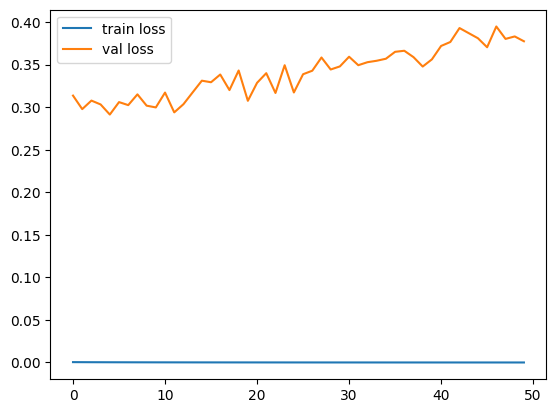

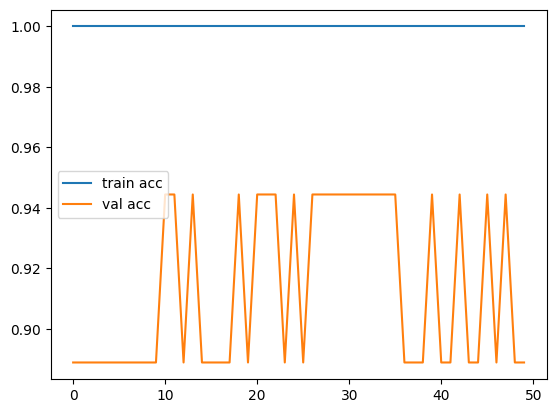

<Figure size 640x480 with 0 Axes>

In [34]:
# plot the loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [35]:
# save it as a h5 file


from tensorflow.keras.models import load_model

model.save('model_resnet50.h5')

In [36]:

y_pred = model.predict(test_set)


1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step


In [37]:
y_pred

array([[2.3652789e-04, 4.3919398e-03, 4.9801474e-05, 9.9532169e-01],
       [9.9999720e-01, 2.7976557e-06, 1.1614945e-10, 3.6739375e-13],
       [4.2101874e-06, 9.9957353e-01, 1.2358598e-13, 4.2228666e-04],
       [7.3221977e-06, 1.4359335e-03, 5.0817716e-06, 9.9855167e-01],
       [3.0371847e-03, 9.9541068e-01, 4.7202363e-07, 1.5517748e-03],
       [1.9460302e-09, 9.9999982e-01, 2.2975836e-14, 7.2521367e-08],
       [3.1673628e-10, 9.9999982e-01, 3.1428033e-14, 1.2201011e-07],
       [4.8923090e-01, 9.9793382e-02, 4.2019502e-10, 4.1097561e-01],
       [3.8728387e-05, 8.6025742e-05, 9.9987292e-01, 2.3775065e-06],
       [2.7999127e-07, 8.5678734e-02, 1.9792326e-09, 9.1432095e-01],
       [1.0839405e-02, 4.7373545e-04, 9.8784822e-01, 8.3865493e-04],
       [1.4727791e-05, 1.4431090e-05, 9.9997050e-01, 2.8462023e-07],
       [9.7779288e-14, 9.9999493e-01, 8.1819369e-12, 4.9945315e-06],
       [6.5500162e-06, 5.1721727e-08, 9.9999207e-01, 1.2621748e-06],
       [4.4405204e-09, 2.9429270e-

In [38]:
import numpy as np
y_pred = np.argmax(y_pred, axis=1)

In [39]:
y_pred

array([3, 0, 1, 3, 1, 1, 1, 0, 2, 3, 2, 2, 1, 2, 3, 1, 2, 0])

In [44]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

In [45]:
model=load_model('model_resnet50.h5')

In [47]:
img=image.load_img('/Users/apple/Downloads/Project/Cotton-Disease-Prediction-End-to-End-DL-Project/research/uploads/d_40_iaip.jpg',target_size=(224,224))



In [48]:
x=image.img_to_array(img)
x

array([[[157., 238.,  97.],
        [166., 242., 110.],
        [150., 226., 102.],
        ...,
        [151., 141.,  72.],
        [166., 154.,  78.],
        [193., 181., 107.]],

       [[156., 237.,  96.],
        [166., 242., 110.],
        [163., 237., 114.],
        ...,
        [168., 154.,  89.],
        [213., 205., 133.],
        [186., 177., 108.]],

       [[154., 237.,  95.],
        [166., 242., 110.],
        [174., 245., 123.],
        ...,
        [220., 204., 142.],
        [209., 201., 139.],
        [148., 139.,  82.]],

       ...,

       [[102., 203.,  23.],
        [106., 206.,  28.],
        [109., 209.,  33.],
        ...,
        [143., 219.,  95.],
        [145., 221.,  97.],
        [145., 221.,  97.]],

       [[104., 206.,  21.],
        [109., 210.,  28.],
        [112., 213.,  33.],
        ...,
        [142., 218.,  94.],
        [145., 215.,  93.],
        [145., 215.,  93.]],

       [[107., 209.,  24.],
        [108., 209.,  27.],
        [109., 2

In [49]:
x.shape

(224, 224, 3)

In [50]:
x=x/255

In [51]:
import numpy as np
x=np.expand_dims(x,axis=0)
img_data=preprocess_input(x)
img_data.shape

(1, 224, 224, 3)

In [52]:
model.predict(img_data)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 541ms/step


array([[0., 0., 0., 1.]], dtype=float32)

In [53]:
a=np.argmax(model.predict(img_data), axis=1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 145ms/step


In [54]:
a==1

array([False])

In [55]:
import tensorflow as tf

In [56]:
tf.__version__

'2.16.2'